# Quantum Entanglement Purification

## Deutsch's Protocol

In [156]:
import numpy as np
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit
from qiskit import transpile
from qiskit.result import Counts, marginal_counts
from qiskit.visualization import array_to_latex, plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit.quantum_info import random_statevector, Statevector
from qiskit.providers.aer import StatevectorSimulator, QasmSimulator
from qiskit.circuit.library import RXGate

In [157]:
class QuantumCircuitOperations:
    def __init__(self, barrier: bool = False):
        self.barrier = barrier
    
    def create_random_statevector(self, dimensions: int) -> Statevector:
        return random_statevector(dimensions)
    
    def create_bell_pairs(self, qc: QuantumCircuit, regs: list) -> None:
        if self.barrier: qc.barrier()
        for reg in regs:
            for q in range(reg.size):
                if q % 2 == 0:
                    qc.h(reg[q])
                    qc.cx(reg[q], reg[q + 1])

In [158]:
class QuantumNativeSimulations:
    def statevector_sim(self, qc: QuantumCircuit) -> Statevector:
        # returns the circuit statevector
        state_sim: StatevectorSimulator = StatevectorSimulator()
        return state_sim.run(transpile(qc, state_sim)).result().get_statevector()
    
    def qasm_sim(self, qc: QuantumCircuit) -> Counts:
        qasm_sim: QasmSimulator = QasmSimulator()
        return qasm_sim.run(transpile(qc, qasm_sim), shots=10000).result().get_counts()

In [159]:
alice: QuantumRegister = QuantumRegister(2, "alice")
bob: QuantumRegister = QuantumRegister(2, "bob")

# crz: ClassicalRegister = ClassicalRegister(1, "crz")
# crx: ClassicalRegister = ClassicalRegister(1, "crx")

coz: ClassicalRegister = ClassicalRegister(1, "coz")
cox: ClassicalRegister = ClassicalRegister(1, "cox")

qc: QuantumCircuit = QuantumCircuit(alice, bob, coz, cox)

In [160]:
qco: QuantumCircuitOperations = QuantumCircuitOperations(True)
qns: QuantumNativeSimulations = QuantumNativeSimulations()

In [161]:
qco.create_bell_pairs(qc, [alice, bob])

In [162]:
qc.barrier()
qc.append(RXGate(np.pi/2), [alice[0]])
qc.append(RXGate(np.pi/2), [bob[0]])
qc.append(RXGate(-np.pi/2), [alice[1]])
qc.append(RXGate(-np.pi/2), [bob[1]])

In [163]:
qc.barrier()
qc.cx(alice[0], bob[0])
qc.cx(alice[1], bob[1])

In [164]:
qc.barrier()
qc.cx(alice[0], alice[1])
qc.h(alice[0])

In [165]:
qc.barrier()
qc.measure(alice[0], coz)
qc.measure(alice[1], cox)

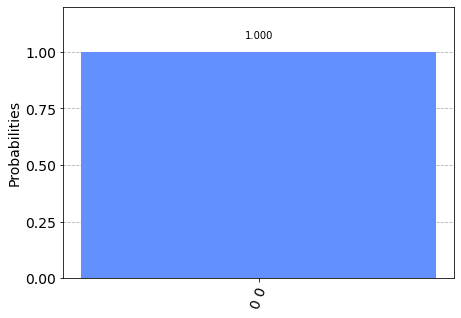

In [166]:
counts: Counts = qns.qasm_sim(qc)
plot_histogram(counts)

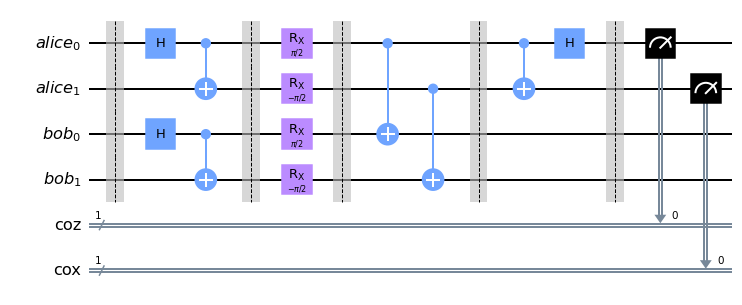

In [167]:
qc.draw("mpl")